# Introduction

This project is all about the prediction of heart health.

# Importing Dependencies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings("ignore")

# Importing data and analysing

In [29]:
# setting path 
path = './HeartDiseaseTrain-Test.csv'

In [30]:
# reading data data set
df = pd.read_csv(path)
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


about the data 

Age
Sex : male : 1
female : 0

chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

resting blood pressure (in mm Hg on admission to the hospital)

serum cholestoral in mg/dl

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Target : 0 No Heart disease
1 Heart disease

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [32]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [33]:
df.shape

(1025, 14)

In [34]:
# since we are not having any NaN we need to check wheather a datapoint is zero or not

def checkZero(df, col_name_list):
    print(f"list size which u are checking is: {len(col_name_list)}\n")
    for cols in col_name_list:
        if (df[cols] != 0).any():
            print(f"{cols} has no zeros")
        else:
            print(f"{cols} has zeros")
    
    return "\nDone checking the zeros in cols"


In [35]:
print(checkZero(df, ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']))

list size which u are checking is: 5

age has no zeros
resting_blood_pressure has no zeros
cholestoral has no zeros
Max_heart_rate has no zeros
oldpeak has no zeros

Done checking the zeros in cols


So in this above dataset we don't have any missing or NaN ... so we can proceed to our further step.

In [36]:
# Encoding SEX 
df['sex'].replace({'Female': 0, 'Male':1}, inplace=True)

# Encoding chest pain type
df['chest_pain_type'].replace({
    'Typical angina' : 1,
    'Non-anginal pain': 2,
    'Atypical angina': 3,
    'Asymptomatic':4
}, inplace=True)

# Encoding fasting blood sugar
df['fasting_blood_sugar'].replace({'Lower than 120 mg/ml': 0, 'Greater than 120 mg/ml': 1}, inplace=True)

# Encoding the rest ecg
df['rest_ecg'].replace({'ST-T wave abnormality': 1, 'Normal': 2, 'Left ventricular hypertrophy': 3}, inplace=True)

# Encoding the Exercise induced angina
df['exercise_induced_angina'].replace({'No': 0, 'Yes': 1}, inplace=True)

# Encoding slope
df['slope'].replace({'Flat': 1, 'Downsloping': 2, 'Upsloping': 3}, inplace=True)

# Encoding vessel colored by fluorosopy
df['vessels_colored_by_flourosopy'].replace({
    'Zero':0,
    'One':1,
    'Two':2,
    'Three':3,
    'Four':4
}, inplace=True)

# Encoding Thalassemia
df['thalassemia'].replace({
    'Fixed Defect':3,
    'Reversable Defect': 2,
    'Normal': 1,
    'No':0
}, inplace=True)

In [37]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,2,2,2,0
1,53,1,1,140,203,1,2,155,1,3.1,3,0,2,0
2,70,1,1,145,174,0,1,125,1,2.6,3,0,2,0
3,61,1,1,148,203,0,1,161,0,0.0,2,1,2,0
4,62,0,1,138,294,1,1,106,0,1.9,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,3,140,221,0,1,164,1,0.0,2,0,3,1
1021,60,1,1,125,258,0,2,141,1,2.8,1,1,2,0
1022,47,1,1,110,275,0,2,118,1,1.0,1,1,3,0
1023,50,0,1,110,254,0,2,159,0,0.0,2,0,3,1


# EDA

<Axes: xlabel='target', ylabel='count'>

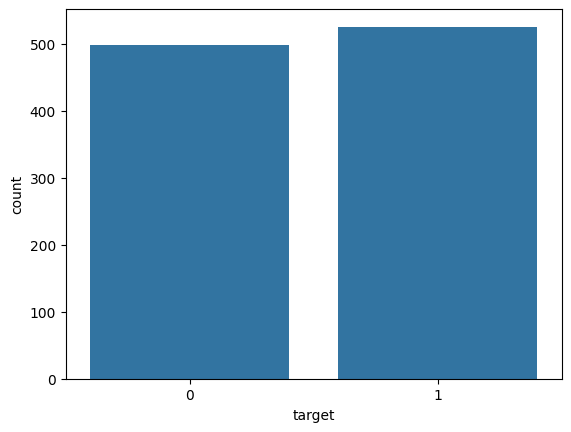

In [38]:
sns.countplot(x='target', data=df)

In [39]:
# correlations
corr = df.corr()
corr

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
age,1.000000,-0.103240,-0.107819,0.271121,0.219823,0.121243,0.183544,-0.390227,0.088163,0.208137,-0.125333,0.271551,-0.112782,-0.229324
sex,-0.103240,1.000000,-0.007902,-0.078974,-0.198258,0.027200,-0.022421,-0.049365,0.139157,0.084687,0.030139,0.111729,-0.330106,-0.279501
chest_pain_type,-0.107819,-0.007902,1.000000,0.032418,-0.070620,0.023624,-0.091537,0.350566,-0.400109,-0.225154,0.142803,-0.205745,0.232613,0.416055
resting_blood_pressure,0.271121,-0.078974,0.032418,1.000000,0.127977,0.181767,0.165990,-0.039264,0.061197,0.187434,0.022083,0.104554,-0.132194,-0.138772
cholestoral,0.219823,-0.198258,-0.070620,0.127977,1.000000,0.026917,0.179569,-0.021772,0.067382,0.064880,-0.068786,0.074259,0.037617,-0.099966
fasting_blood_sugar,0.121243,0.027200,0.023624,0.181767,0.026917,1.000000,0.069112,-0.008866,0.049261,0.010859,0.070254,0.137156,-0.130060,-0.041164
rest_ecg,0.183544,-0.022421,-0.091537,0.165990,0.179569,0.069112,1.000000,-0.130444,0.100127,0.174719,-0.075187,0.103185,-0.056249,-0.186374
Max_heart_rate,-0.390227,-0.049365,0.350566,-0.039264,-0.021772,-0.008866,-0.130444,1.000000,-0.380281,-0.349796,0.311432,-0.207888,0.286306,0.422895
exercise_induced_angina,0.088163,0.139157,-0.400109,0.061197,0.067382,0.049261,0.100127,-0.380281,1.000000,0.310844,-0.175494,0.107849,-0.288373,-0.438029
oldpeak,0.208137,0.084687,-0.225154,0.187434,0.064880,0.010859,0.174719,-0.349796,0.310844,1.000000,-0.080059,0.221816,-0.293422,-0.438441


<Axes: >

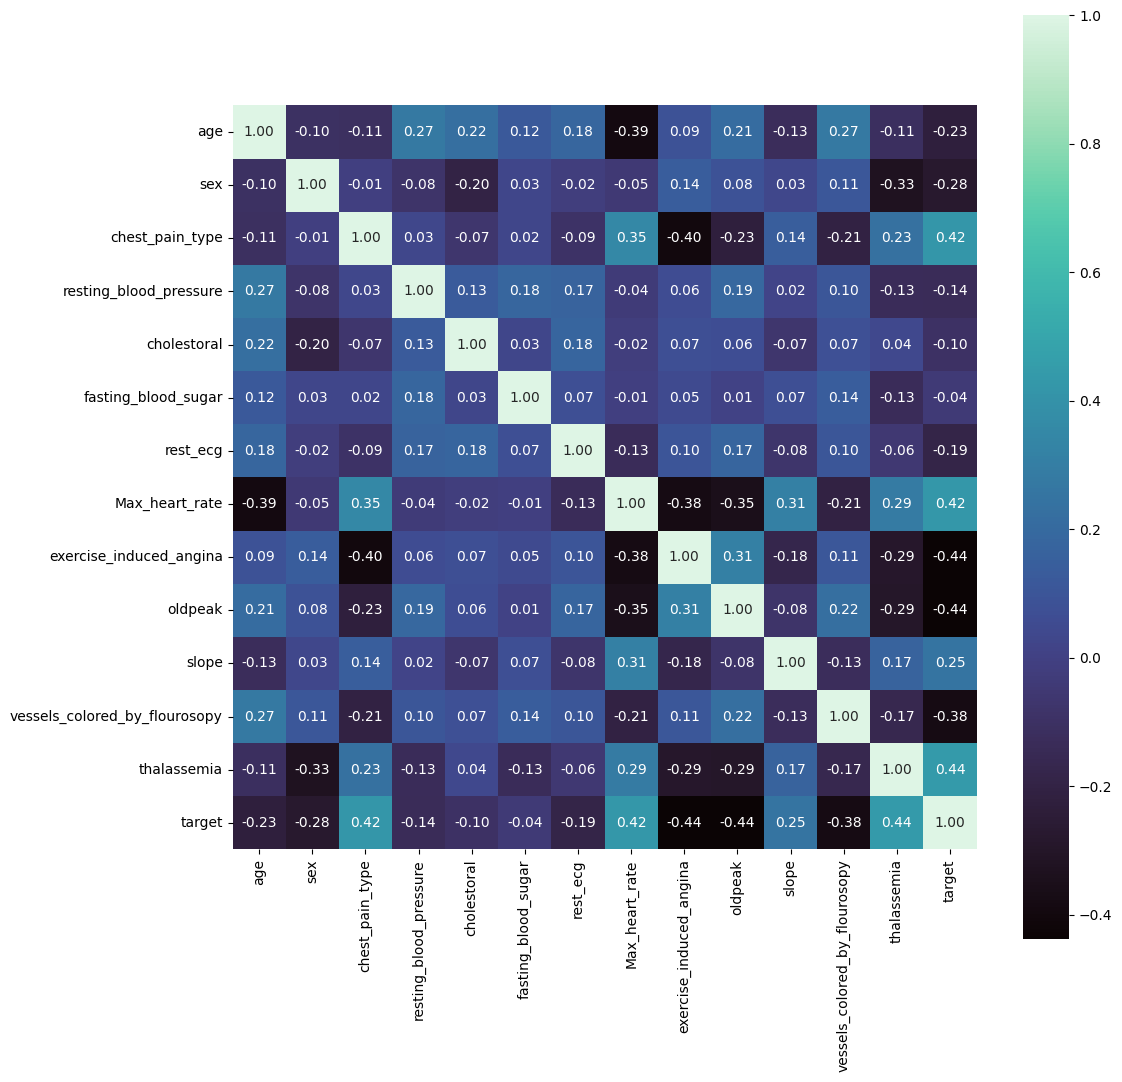

In [40]:
# plotting heatmap of correlations

plt.figure(figsize=[12,12])
sns.heatmap(corr, square=True, annot= True ,fmt='.2f', cbar=True, cmap='mako')

as we can see here

1. Thalassemia , Max_heart_rate, chest_pain_type are highly positively correlated with target
2. exercise induced angina and old peak also highly correlated
3. fasting blood sugar having the lowest correlation with our target.

# Model

In [41]:
# Selecting Features and Target 
X = df.drop(columns='target', axis=1)
Y = df['target']

In [42]:
# train test split 
X_train, X_test, Y_train, Y_Test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [43]:
X_train.shape, X_test.shape, Y_train.shape, Y_Test.shape

((820, 13), (205, 13), (820,), (205,))

In [44]:
logistic_model = LogisticRegression(random_state=2)
logistic_model

LogisticRegression(random_state=2)

In [45]:
CV_score = cross_val_score(logistic_model, X,Y, cv=25, scoring='recall')
CV_score

array([0.80952381, 0.9047619 , 0.80952381, 0.85714286, 0.9047619 ,
       0.80952381, 0.80952381, 0.9047619 , 0.9047619 , 0.66666667,
       0.9047619 , 0.80952381, 0.95238095, 0.85714286, 1.        ,
       0.85714286, 0.85714286, 0.80952381, 0.85714286, 0.85714286,
       0.80952381, 0.80952381, 0.85714286, 0.85714286, 0.77272727])

In [46]:
max_cv_score = np.max(CV_score)
min_cv_score = np.min(CV_score)
mean_cv_score = np.mean(CV_score)

print(f"Max score: {max_cv_score}")
print(f"Min score: {min_cv_score}")
print(f"Mean score: {mean_cv_score}")

Max score: 1.0
Min score: 0.6666666666666666
Mean score: 0.8499567099567099


### Standardization of the feature

In [47]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

Model Training

In [48]:
logistic_model.fit(X_train,Y_train)

LogisticRegression(random_state=2)

In [49]:
print(f"train data accuracy: {logistic_model.score(X_train, Y_train)}")
print(f"test data accuracy: {logistic_model.score(X_test, Y_Test)}")

train data accuracy: 0.8536585365853658
test data accuracy: 0.8439024390243902


In [54]:
# CV on training set
cv_score_on_train = cross_val_score(logistic_model, X_train,Y_train, cv=5, scoring='recall')
print(f"CV score only on train dataset (recall): {np.mean(cv_score_on_train)}")

CV score only on train dataset (recall): 0.8660068846815836


In [55]:
logistic_model_predicted_y = logistic_model.predict(X_test) 

In [57]:
# Checking the accuracy using Recall.

recall_score = recall_score(Y_Test, logistic_model_predicted_y)

print(f"Recall score in train dataset (Y_test and model predicted Y): {recall_score}")

TypeError: 'float' object is not callable